In [1]:
# Standard
import numpy as np
import pandas as pd


In [2]:
# Stats
from scipy import stats

In [3]:
# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from __future__ import division

In [4]:
liquor05 = pd.read_csv("liquor/2005liquorlicense.csv")

In [5]:
liquor05.head(6)

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Serial#,County,Type,Class,Premises Name,Address,Address2,City,State,Zip
5,1138854,KING,OP,252,111 HICKS STREET RESTAURANT CORP,111 HICKS ST AKA 101 HICKS ST,NaN,BROOKLYN,NY,11201


In [6]:
liquor05.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

In [7]:
liquor05.head()

,Serial,County,Type,Class,Premises Name,Address,Address2,City,State,Zip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Serial#,County,Type,Class,Premises Name,Address,Address2,City,State,Zip


In [8]:
# Drop the first four rows
liquor05 = liquor05.drop(liquor05.index[[0,1,2,3,4]])

In [9]:
liquor05.head()

,Serial,County,Type,Class,Premises Name,Address,Address2,City,State,Zip
5,1138854,KING,OP,252,111 HICKS STREET RESTAURANT CORP,111 HICKS ST AKA 101 HICKS ST,NaN,BROOKLYN,NY,11201
6,1011764,KING,OP,252,137 COURT STREET REST INC,137 COURT STREET,NaN,BROOKLYN,NY,11201
7,1130746,KING,OP,252,191 SMITH ST REST CORP,191 SMITH ST,NaN,BROOKLYN,NY,11201
8,1011844,KING,OP,252,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,NaN,BROOKLYN,NY,11207
9,1011845,KING,OP,903,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,NaN,BROOKLYN,NY,11207


In [10]:
liquor05 = liquor05.reset_index(drop=True)

In [11]:
# Assign zipcodes to neighborhoods

myDict = {'11205':'Bedford Stuyvesant','11206':'Bedford Stuyvesant','11216':'Bedford Stuyvesant','11221':
          'Bedford Stuyvesant','11233':'Bedford Stuyvesant','11204':'Bensonhurst','11214':'Bensonhurst',
          '11219':'Borough Park','11201':'Brooklyn Heights/Fort Greene','11221':'Bushwick','11237':'Bushwick',
          '11224':'Coney Island','11203':'East Flatbush','11212':'East Flatbush','11207':'East New York/Starrett City',
          '11239':'East New York/Starrett City','11226':'Flatbush','11210':'Flatbush','11234':'Flatlands/Canarsie',
          '11238':'North Crown Heights/Prospect Heights','11215': 'Park Slope/Carroll Gardens',
          '11217':'Park Slope/Carroll Gardens','11239':'Sheepshed Bay','11225':'South Crown Heights/Lefferts Gardens',
          '11213':'South Crown Heights/Lefferts Gardens','11220':'Sunset Park','11232':'Sunset Park',
          '11206':'Williamsburg/Greenpoint','11211':'Williamsburg/Greenpoint','11249':'Williamsburg/Greenpoint'}

In [12]:
liquor05['Class'].unique(),len(liquor05['Class'])

(array(['252', '903', '341', '141', '241', '901', '344', '441', '540',
       '240', '246'], dtype=object),
 248)

In [13]:
Year05 = []
for value in range(len(liquor05['Class'])):
    Year05.append(2005)

In [14]:
liquor05['Year'] = Year05

In [15]:
del liquor05['Serial']
del liquor05['County']
del liquor05['Address2']
del liquor05['City']
del liquor05['State']

In [16]:
liquor05.head()

,Type,Class,Premises Name,Address,Zip,Year
0,OP,252,111 HICKS STREET RESTAURANT CORP,111 HICKS ST AKA 101 HICKS ST,11201,2005
1,OP,252,137 COURT STREET REST INC,137 COURT STREET,11201,2005
2,OP,252,191 SMITH ST REST CORP,191 SMITH ST,11201,2005
3,OP,252,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,11207,2005
4,OP,903,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,11207,2005


In [17]:
# We include False because I am only looking at certain years

a = []

for key in liquor05['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)

In [18]:
# Attach the SubBorough list to the df

liquor05['SubBorough'] = a

In [19]:
liquor05.head()

,Type,Class,Premises Name,Address,Zip,Year,SubBorough
0,OP,252,111 HICKS STREET RESTAURANT CORP,111 HICKS ST AKA 101 HICKS ST,11201,2005,Brooklyn Heights/Fort Greene
1,OP,252,137 COURT STREET REST INC,137 COURT STREET,11201,2005,Brooklyn Heights/Fort Greene
2,OP,252,191 SMITH ST REST CORP,191 SMITH ST,11201,2005,Brooklyn Heights/Fort Greene
3,OP,252,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,11207,2005,East New York/Starrett City
4,OP,903,22ND STREET SPRINGFIELD CORP,73 WORTMAN AVENUE,11207,2005,East New York/Starrett City


In [20]:
stats05 = liquor05.groupby('SubBorough')

In [21]:
stats05.SubBorough

In [22]:
stats05.count()

,Type,Class,Premises Name,Address,Zip,Year,SubBorough
SubBorough,,,,,,,
False,85,85,85,85,85,85,85
Bedford Stuyvesant,16,16,16,16,16,16,16
Bensonhurst,12,12,12,12,12,12,12
Borough Park,1,1,1,1,1,1,1
Brooklyn Heights/Fort Greene,17,17,17,17,17,17,17
Bushwick,19,19,19,19,19,19,19
Coney Island,4,4,4,4,4,4,4
East Flatbush,3,3,3,3,3,3,3
East New York/Starrett City,7,7,7,7,7,7,7


In [23]:
Year05 = pd.Series(stats05.Type.count())

In [24]:
Year05 = pd.DataFrame(Year05)

In [25]:
Year2005 = pd.Series(Year05[0])

In [26]:
Brooklyn = Year2005.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [27]:
Brooklyn.columns = ['SubBorough','2005']

In [28]:
Brooklyn.head()

,SubBorough,2005
0,False,85
1,Bedford Stuyvesant,16
2,Bensonhurst,12
3,Borough Park,1
4,Brooklyn Heights/Fort Greene,17


In [29]:
liquor06 = pd.read_csv("liquor/2006liquorlicense.csv")

In [30]:
liquor06.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor06 = liquor06.drop(liquor06.index[[0,1,2,3,4]])

Year06 = []
for value in range(len(liquor06['Class'])):
    Year06.append(2006)
    
liquor06['Year'] = Year06

del liquor06['Serial']
del liquor06['County']
del liquor06['Address2']
del liquor06['City']
del liquor06['State']

# We include False because I am only looking at certain years

a = []

for key in liquor06['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor06['SubBorough'] = a 

stats06 = liquor06.groupby('SubBorough')
Year06 = pd.Series(stats06.Type.count())
Year06 = pd.DataFrame(Year06)
Year2006 = pd.Series(Year06[0])
Year2006 = Year2006.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2006 = pd.DataFrame(Year2006)
Year2006.columns = ['SubBorough','2006']

In [31]:
Year2006.head(4)

,SubBorough,2006
0,False,69
1,Bedford Stuyvesant,10
2,Bensonhurst,7
3,Borough Park,4


In [32]:
liquor07 = pd.read_csv("liquor/2007liquorlicense.csv")

In [33]:
liquor07.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor07 = liquor07.drop(liquor07.index[[0,1,2,3,4]])

Year07 = []
for value in range(len(liquor07['Class'])):
    Year07.append(2007)
    
liquor07['Year'] = Year07

del liquor07['Serial']
del liquor07['County']
del liquor07['Address2']
del liquor07['City']
del liquor07['State']

# We include False because I am only looking at certain years

a = []

for key in liquor07['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor07['SubBorough'] = a 

stats07 = liquor07.groupby('SubBorough')
Year07 = pd.Series(stats07.Type.count())
Year07 = pd.DataFrame(Year07)
Year2007 = pd.Series(Year07[0])
Year2007 = Year2007.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2007 = pd.DataFrame(Year2007)
Year2007.columns = ['SubBorough','2007']

In [34]:
Year2007.head(5)

,SubBorough,2007
0,False,81
1,Bedford Stuyvesant,8
2,Bensonhurst,10
3,Borough Park,6
4,Brooklyn Heights/Fort Greene,12


In [35]:
liquor08 = pd.read_csv("liquor/2008liquorlicense.csv")

In [36]:
liquor08.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor08 = liquor08.drop(liquor08.index[[0,1,2,3,4]])

Year08 = []
for value in range(len(liquor08['Class'])):
    Year08.append(2008)
    
liquor08['Year'] = Year08

del liquor08['Serial']
del liquor08['County']
del liquor08['Address2']
del liquor08['City']
del liquor08['State']

# We include False because I am only looking at certain years

a = []

for key in liquor08['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor08['SubBorough'] = a 

stats08 = liquor08.groupby('SubBorough')
Year08 = pd.Series(stats08.Type.count())
Year08 = pd.DataFrame(Year08)
Year2008 = pd.Series(Year08[0])
Year2008 = Year2008.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2008 = pd.DataFrame(Year2008)
Year2008.columns = ['SubBorough','2008']

In [37]:
Year2008.head(5)

,SubBorough,2008
0,False,69
1,Bedford Stuyvesant,10
2,Bensonhurst,14
3,Borough Park,3
4,Brooklyn Heights/Fort Greene,8


In [38]:
liquor09 = pd.read_csv("liquor/2009liquorlicense.csv")

In [39]:
liquor09.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor09 = liquor09.drop(liquor09.index[[0,1,2,3,4]])

Year09 = []
for value in range(len(liquor09['Class'])):
    Year09.append(2009)
    
liquor09['Year'] = Year09

del liquor09['Serial']
del liquor09['County']
del liquor09['Address2']
del liquor09['City']
del liquor09['State']

# We include False because I am only looking at certain years

a = []

for key in liquor09['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor09['SubBorough'] = a 

stats09 = liquor09.groupby('SubBorough')
Year09 = pd.Series(stats09.Type.count())
Year09 = pd.DataFrame(Year09)
Year2009 = pd.Series(Year09[0])
Year2009 = Year2009.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2009 = pd.DataFrame(Year2009)
Year2009.columns = ['SubBorough','2009']

In [40]:
Year2009.head()

,SubBorough,2009
0,False,91
1,Bedford Stuyvesant,9
2,Bensonhurst,14
3,Borough Park,4
4,Brooklyn Heights/Fort Greene,15


In [41]:
liquor10 = pd.read_csv("liquor/2010liquorlicense.csv")

In [42]:
liquor10.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor10 = liquor10.drop(liquor10.index[[0,1,2,3,4]])

Year10 = []
for value in range(len(liquor10['Class'])):
    Year10.append(2010)
    
liquor10['Year'] = Year10

del liquor10['Serial']
del liquor10['County']
del liquor10['Address2']
del liquor10['City']
del liquor10['State']

# We include False because I am only looking at certain years

a = []

for key in liquor10['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor10['SubBorough'] = a 

stats10 = liquor10.groupby('SubBorough')
Year10 = pd.Series(stats10.Type.count())
Year10 = pd.DataFrame(Year10)
Year2010 = pd.Series(Year10[0])
Year2010 = Year2010.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2010 = pd.DataFrame(Year2010)
Year2010.columns = ['SubBorough','2010']

In [43]:
Year2010.head(5)

,SubBorough,2010
0,False,72
1,Bedford Stuyvesant,12
2,Bensonhurst,10
3,Borough Park,6
4,Brooklyn Heights/Fort Greene,25


In [44]:
liquor11 = pd.read_csv("liquor/2011liquorlicense.csv")

In [45]:
liquor11.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor11 = liquor11.drop(liquor11.index[[0,1,2,3,4]])

Year11 = []
for value in range(len(liquor11['Class'])):
    Year11.append(2011)
    
liquor11['Year'] = Year11

del liquor11['Serial']
del liquor11['County']
del liquor11['Address2']
del liquor11['City']
del liquor11['State']

# We include False because I am only looking at certain years

a = []

for key in liquor11['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor11['SubBorough'] = a 

stats11 = liquor11.groupby('SubBorough')
Year11 = pd.Series(stats11.Type.count())
Year11 = pd.DataFrame(Year11)
Year2011 = pd.Series(Year11[0])
Year2011 = Year2011.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2011 = pd.DataFrame(Year2011)
Year2011.columns = ['SubBorough','2011']

In [46]:
Year2011

,SubBorough,2011
0,False,83
1,Bedford Stuyvesant,14
2,Bensonhurst,12
3,Borough Park,7
4,Brooklyn Heights/Fort Greene,13
5,Bushwick,5
6,Coney Island,12
7,East Flatbush,5
8,East New York/Starrett City,4
9,Flatbush,6


In [47]:
liquor12 = pd.read_csv("liquor/2012liquorlicense.csv")

In [48]:
liquor12.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor12 = liquor12.drop(liquor12.index[[0,1,2,3,4]])

Year12 = []
for value in range(len(liquor12['Class'])):
    Year12.append(2012)
    
liquor12['Year'] = Year12

del liquor12['Serial']
del liquor12['County']
del liquor12['Address2']
del liquor12['City']
del liquor12['State']

# We include False because I am only looking at certain years

a = []

for key in liquor12['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor12['SubBorough'] = a 

stats12 = liquor12.groupby('SubBorough')
Year12 = pd.Series(stats12.Type.count())
Year12 = pd.DataFrame(Year12)
Year2012 = pd.Series(Year12[0])
Year2012 = Year2012.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2012 = pd.DataFrame(Year2012)
Year2012.columns = ['SubBorough','2012']

In [49]:
Year2012

,SubBorough,2012
0,False,83
1,Bedford Stuyvesant,17
2,Bensonhurst,12
3,Borough Park,3
4,Brooklyn Heights/Fort Greene,26
5,Bushwick,15
6,Coney Island,7
7,East Flatbush,7
8,East New York/Starrett City,6
9,Flatbush,2


In [50]:
liquor13 = pd.read_csv("liquor/2013liquorlicense.csv")

In [51]:
liquor13.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip"]

# Drop the first four rows
liquor13 = liquor13.drop(liquor13.index[[0,1,2,3,4]])

Year13 = []
for value in range(len(liquor13['Class'])):
    Year13.append(2013)
    
liquor13['Year'] = Year13

del liquor13['Serial']
del liquor13['County']
del liquor13['Address2']
del liquor13['City']
del liquor13['State']

# We include False because I am only looking at certain years

a = []

for key in liquor13['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor13['SubBorough'] = a 

stats13 = liquor13.groupby('SubBorough')
Year13 = pd.Series(stats13.Type.count())
Year13 = pd.DataFrame(Year13)
Year2013 = pd.Series(Year13[0])
Year2013 = Year2013.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2013 = pd.DataFrame(Year2013)
Year2013.columns = ['SubBorough','2013']

In [52]:
Year2013

,SubBorough,2013
0,False,112
1,Bedford Stuyvesant,20
2,Bensonhurst,15
3,Borough Park,11
4,Brooklyn Heights/Fort Greene,24
5,Bushwick,26
6,Coney Island,1
7,East Flatbush,10
8,East New York/Starrett City,6
9,Flatbush,7


In [53]:
liquor14 = pd.read_csv("liquor/2014liquorlicense.csv")

In [54]:
liquor14.head()

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Serial#,County,Type,Class,Premises Name,Address,Address2,City,State,Zip,NaN


In [55]:
liquor14.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip", "Zip2"]

# Drop the first four rows
liquor14 = liquor14.drop(liquor14.index[[0,1,2,3,4]])

Year14 = []
for value in range(len(liquor14['Class'])):
    Year14.append(2014)
    
liquor14['Year'] = Year14

del liquor14['Serial']
del liquor14['County']
del liquor14['Address2']
del liquor14['City']
del liquor14['State']
del liquor14['Zip2']

# We include False because I am only looking at certain years

a = []

for key in liquor14['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor14['SubBorough'] = a 

stats14 = liquor14.groupby('SubBorough')
Year14 = pd.Series(stats14.Type.count())
Year14 = pd.DataFrame(Year14)
Year2014 = pd.Series(Year14[0])
Year2014 = Year2014.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2014 = pd.DataFrame(Year2014)
Year2014.columns = ['SubBorough','2014']

In [56]:
Year2014

,SubBorough,2014
0,False,259
1,Bedford Stuyvesant,45
2,Bensonhurst,18
3,Borough Park,10
4,Brooklyn Heights/Fort Greene,70
5,Bushwick,42
6,Coney Island,14
7,East Flatbush,17
8,East New York/Starrett City,10
9,Flatbush,16


In [57]:
liquor15 = pd.read_csv("liquor/2015liquorlicense.csv")

In [58]:
liquor15.columns = ["Serial","County","Type","Class","Premises Name","Address","Address2","City","State","Zip", "Zip2", "Zip3"]

# Drop the first four rows
liquor15 = liquor15.drop(liquor15.index[[0,1,2,3,4]])

Year15 = []
for value in range(len(liquor15['Class'])):
    Year15.append(2015)
    
liquor15['Year'] = Year15

del liquor15['Serial']
del liquor15['County']
del liquor15['Address2']
del liquor15['City']
del liquor15['State']
del liquor15['Zip2']
del liquor15['Zip3']

# We include False because I am only looking at certain years

a = []

for key in liquor15['Zip']:
    if key in myDict.keys():
        a.append(myDict.get(key))
    else:
        a.append(False)
        
liquor15['SubBorough'] = a 

stats15 = liquor15.groupby('SubBorough')
Year15 = pd.Series(stats15.Type.count())
Year15 = pd.DataFrame(Year15)
Year2015 = pd.Series(Year15[0])
Year2015 = Year2015.reset_index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Year2015 = pd.DataFrame(Year2015)
Year2015.columns = ['SubBorough','2015']

In [59]:
Year2015

,SubBorough,2015
0,False,441
1,Bedford Stuyvesant,77
2,Bensonhurst,50
3,Borough Park,22
4,Brooklyn Heights/Fort Greene,111
5,Bushwick,80
6,Coney Island,29
7,East Flatbush,20
8,East New York/Starrett City,17
9,Flatbush,31


In [60]:
Brooklyn1 = pd.concat([Brooklyn,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011],axis=1)#,Year2012,Year2013,Year2014,Year2015],axis=1)
Brooklyn1

,SubBorough,2005,SubBorough,2006,SubBorough,2007,SubBorough,2008,SubBorough,2009,SubBorough,2010,SubBorough,2011
0,False,85,False,69,False,81,False,69,False,91,False,72,False,83
1,Bedford Stuyvesant,16,Bedford Stuyvesant,10,Bedford Stuyvesant,8,Bedford Stuyvesant,10,Bedford Stuyvesant,9,Bedford Stuyvesant,12,Bedford Stuyvesant,14
2,Bensonhurst,12,Bensonhurst,7,Bensonhurst,10,Bensonhurst,14,Bensonhurst,14,Bensonhurst,10,Bensonhurst,12
3,Borough Park,1,Borough Park,4,Borough Park,6,Borough Park,3,Borough Park,4,Borough Park,6,Borough Park,7
4,Brooklyn Heights/Fort Greene,17,Brooklyn Heights/Fort Greene,9,Brooklyn Heights/Fort Greene,12,Brooklyn Heights/Fort Greene,8,Brooklyn Heights/Fort Greene,15,Brooklyn Heights/Fort Greene,25,Brooklyn Heights/Fort Greene,13
5,Bushwick,19,Bushwick,11,Bushwick,11,Bushwick,13,Bushwick,16,Bushwick,16,Bushwick,5
6,Coney Island,4,Coney Island,4,Coney Island,1,Coney Island,4,Coney Island,3,Coney Island,5,Coney Island,12
7,East Flatbush,3,East Flatbush,7,East Flatbush,7,East Flatbush,4,East Flatbush,6,East Flatbush,5,East Flatbush,5
8,East New York/Starrett City,7,East New York/Starrett City,9,East New York/Starrett City,5,East New York/Starrett City,4,East New York/Starrett City,1,East New York/Starrett City,2,East New York/Starrett City,4
9,Flatbush,1,Flatbush,8,Flatbush,5,Flatbush,9,Flatbush,8,Flatbush,6,Flatbush,6


In [61]:
Year2012 = Year2012.drop(Year2012.index[[13]])
Year2012 = Year2012.reset_index()
Year2012

,index,SubBorough,2012
0,0,False,83
1,1,Bedford Stuyvesant,17
2,2,Bensonhurst,12
3,3,Borough Park,3
4,4,Brooklyn Heights/Fort Greene,26
5,5,Bushwick,15
6,6,Coney Island,7
7,7,East Flatbush,7
8,8,East New York/Starrett City,6
9,9,Flatbush,2


In [62]:
Year2013 = Year2013.drop(Year2013.index[[13]])
Year2013 = Year2013.reset_index()
Year2013

,index,SubBorough,2013
0,0,False,112
1,1,Bedford Stuyvesant,20
2,2,Bensonhurst,15
3,3,Borough Park,11
4,4,Brooklyn Heights/Fort Greene,24
5,5,Bushwick,26
6,6,Coney Island,1
7,7,East Flatbush,10
8,8,East New York/Starrett City,6
9,9,Flatbush,7


In [63]:
Year2014 = Year2014.drop(Year2014.index[[13]])
Year2014 = Year2014.reset_index()
Year2014

,index,SubBorough,2014
0,0,False,259
1,1,Bedford Stuyvesant,45
2,2,Bensonhurst,18
3,3,Borough Park,10
4,4,Brooklyn Heights/Fort Greene,70
5,5,Bushwick,42
6,6,Coney Island,14
7,7,East Flatbush,17
8,8,East New York/Starrett City,10
9,9,Flatbush,16


In [64]:
Year2015 = Year2015.drop(Year2015.index[[13]])
Year2015 = Year2015.reset_index()
Year2015

,index,SubBorough,2015
0,0,False,441
1,1,Bedford Stuyvesant,77
2,2,Bensonhurst,50
3,3,Borough Park,22
4,4,Brooklyn Heights/Fort Greene,111
5,5,Bushwick,80
6,6,Coney Island,29
7,7,East Flatbush,20
8,8,East New York/Starrett City,17
9,9,Flatbush,31


In [65]:
del Year2012['index']
Year2012

,SubBorough,2012
0,False,83
1,Bedford Stuyvesant,17
2,Bensonhurst,12
3,Borough Park,3
4,Brooklyn Heights/Fort Greene,26
5,Bushwick,15
6,Coney Island,7
7,East Flatbush,7
8,East New York/Starrett City,6
9,Flatbush,2


In [66]:
del Year2013['index']
del Year2014['index']
del Year2015['index']

In [67]:
Year2015

,SubBorough,2015
0,False,441
1,Bedford Stuyvesant,77
2,Bensonhurst,50
3,Borough Park,22
4,Brooklyn Heights/Fort Greene,111
5,Bushwick,80
6,Coney Island,29
7,East Flatbush,20
8,East New York/Starrett City,17
9,Flatbush,31


In [68]:
#Brooklyn2 = Brooklyn2.drop(Brooklyn2.index[[13]])

In [69]:
#Brooklyn2 = Brooklyn2.reset_index()

In [70]:
Brooklyn1 = pd.concat([Brooklyn1, Year2012, Year2013, Year2014, Year2015],axis=1)
#Brooklyn1

In [71]:
Brooklyn1.columns

Index([u'SubBorough', u'2005', u'SubBorough', u'2006', u'SubBorough', u'2007', u'SubBorough', u'2008', u'SubBorough', u'2009', u'SubBorough', u'2010', u'SubBorough', u'2011', u'SubBorough', u'2012', u'SubBorough', u'2013', u'SubBorough', u'2014', u'SubBorough', u'2015'], dtype='object')

In [72]:
Brooklyn1.columns = ['SubBorough', '2005', 'a', '2006', 'b', '2007', 'c', '2008',
                    'd', '2009', 'e', '2010', 'f', '2011', 'g', '2012',
                    'h', '2013', 'i', '2014', 'j', '2015']

In [73]:
Brooklyn1.head(2)

,SubBorough,2005,a,2006,b,2007,c,2008,d,2009,e,2010,f,2011,g,2012,h,2013,i,2014,
0,False,85,False,69,False,81,False,69,False,91,False,72,False,83,False,83,False,112,False,259,...
1,Bedford Stuyvesant,16,Bedford Stuyvesant,10,Bedford Stuyvesant,8,Bedford Stuyvesant,10,Bedford Stuyvesant,9,Bedford Stuyvesant,12,Bedford Stuyvesant,14,Bedford Stuyvesant,17,Bedford Stuyvesant,20,Bedford Stuyvesant,45,...


In [74]:
listdel = ['a','b','c','d','e','f','g','h','i','j']

for value in listdel:
    del Brooklyn1[value]

In [75]:
Brooklyn1.columns

Index([u'SubBorough', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015'], dtype='object')

In [76]:
Brooklyn1

,SubBorough,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,False,85,69,81,69,91,72,83,83,112,259,441
1,Bedford Stuyvesant,16,10,8,10,9,12,14,17,20,45,77
2,Bensonhurst,12,7,10,14,14,10,12,12,15,18,50
3,Borough Park,1,4,6,3,4,6,7,3,11,10,22
4,Brooklyn Heights/Fort Greene,17,9,12,8,15,25,13,26,24,70,111
5,Bushwick,19,11,11,13,16,16,5,15,26,42,80
6,Coney Island,4,4,1,4,3,5,12,7,1,14,29
7,East Flatbush,3,7,7,4,6,5,5,7,10,17,20
8,East New York/Starrett City,7,9,5,4,1,2,4,6,6,10,17
9,Flatbush,1,8,5,9,8,6,6,2,7,16,31


In [77]:
Brooklyn1 = Brooklyn1.drop(Brooklyn1.index[[0]])

In [78]:
Brooklyn1 = Brooklyn1.reset_index()

In [79]:
del Brooklyn1['index']

In [80]:
Brooklyn1

,SubBorough,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Bedford Stuyvesant,16,10,8,10,9,12,14,17,20,45,77
1,Bensonhurst,12,7,10,14,14,10,12,12,15,18,50
2,Borough Park,1,4,6,3,4,6,7,3,11,10,22
3,Brooklyn Heights/Fort Greene,17,9,12,8,15,25,13,26,24,70,111
4,Bushwick,19,11,11,13,16,16,5,15,26,42,80
5,Coney Island,4,4,1,4,3,5,12,7,1,14,29
6,East Flatbush,3,7,7,4,6,5,5,7,10,17,20
7,East New York/Starrett City,7,9,5,4,1,2,4,6,6,10,17
8,Flatbush,1,8,5,9,8,6,6,2,7,16,31
9,Flatlands/Canarsie,8,7,6,6,7,2,7,2,9,18,35


In [81]:
Brooklyn2 = Brooklyn1.set_index(Brooklyn1['SubBorough'])

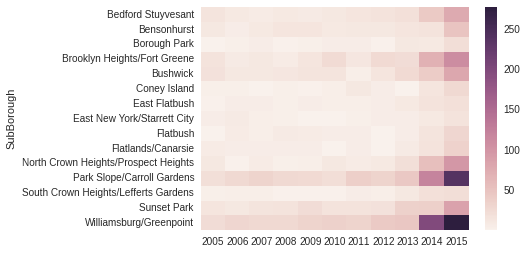

In [82]:
# This dataset is now in a clear format to be dispalyed as a heatmap
Brooklyn2.ix[:,1:] = Brooklyn2.ix[:,1:].astype(int)
sns.heatmap(Brooklyn2.ix[:,1:])
plt.savefig('BrooklynHeat.png')

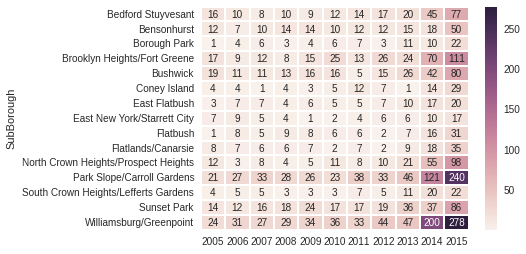

In [83]:
# We also have the option to annotate each cell
sns.heatmap(Brooklyn2.ix[:,1:],annot=True,fmt='d',linewidths=.5,yticklabels=True)
plt.savefig("BrooklynAnnot.png")

In [84]:
yearly_values = Brooklyn2.ix[:,1:].sum()

In [85]:
years = pd.Series(yearly_values.index.values)
years = pd.DataFrame(years)

In [86]:
license = pd.Series(yearly_values.values) 
license = pd.DataFrame(license)

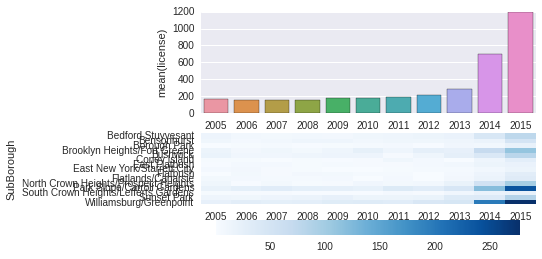

In [87]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

# Make the dframe and name columns
year_dframe = pd.concat((years,license),axis=1)
year_dframe.columns = ['Year','license']



# Create the bar plot on top
sns.barplot('Year',y='license',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(Brooklyn2.ix[:,1:],cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

plt.savefig("BrooklynSum.png")

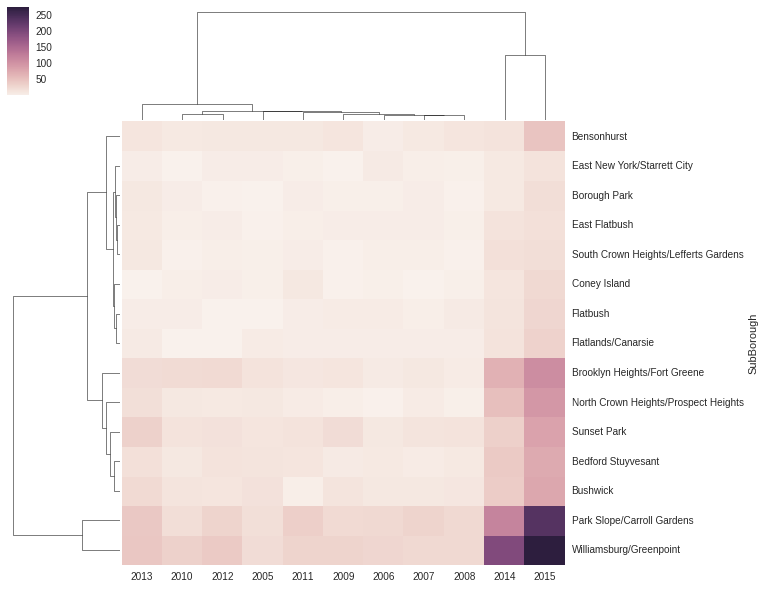

In [88]:
# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(Brooklyn2.ix[:,1:])

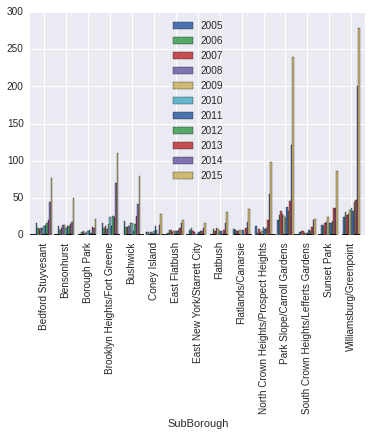

In [89]:
Brooklyn2.plot(kind='bar')

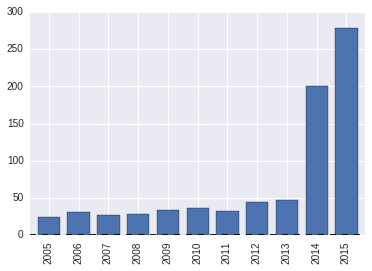

In [90]:
Brooklyn2.ix[14,1:].plot(kind = 'bar')

## Load in features

In [140]:
### Education Features

eduBlack = pd.read_csv('Model_Two/educationBlack.csv')
eduWhite = pd.read_csv('Model_Two/educationWhite.csv')
eduHispanic = pd.read_csv('Model_Two/educationHispanic.csv')

In [141]:
## Population Features
popBlack = pd.read_csv('Model_Two/populationBlack.csv')
popWhite = pd.read_csv('Model_Two/populationWhite.csv')
popHispanic = pd.read_csv('Model_Two/populationHispanic.csv')

In [142]:
## Transit Features
transit = pd.read_csv('Model_Two/CleanTransit.csv')

In [143]:
## Other Features
income_rent = pd.read_csv('Model_Two/income_and_rent.csv')
buildingPermits = pd.read_csv('Model_Two/buildingPermits.csv')
houseSales = pd.read_csv('Model_Two/houseSales.csv')
houseSize = pd.read_csv('Model_Two/houseSize.csv')
unemployment = pd.read_csv('Model_Two/unemployment.csv')
zonedCom = pd.read_csv('Model_Two/zonedCom.csv')
zonedRes = pd.read_csv('Model_Two/zonedRes.csv')

In [144]:
#income_rent = income_rent.drop([0,5])

In [145]:
#income_rent = income_rent.reset_index()

In [146]:
#eduBlack = eduBlack.drop([0,5])
#eduWhite = eduWhite.drop([0,5])
#eduHispanic = eduHispanic.drop([0,5])

In [147]:
#eduBlack = eduBlack.reset_index()
#eduWhite = eduWhite.reset_index()
#eduHispanic = eduHispanic.reset_index()

In [148]:
#popBlack = popBlack.drop([4])

In [149]:
#popBlack = popBlack.reset_index()

In [150]:
#popWhite = popWhite.drop([0])
#popHispanic = popHispanic.drop([0,5])

In [151]:
#popWhite = popWhite.reset_index()
#popHispanic = popHispanic.reset_index()

In [152]:
#eduWhite = eduWhite.drop([0])
#eduWhite = eduWhite.reset_index()

In [153]:
#transit

In [154]:
#houseSales

In [155]:
#buildingPermits

In [156]:
#unemployment.head(3)

In [157]:
#zonedRes.head(3)

In [227]:
## Explore 2007

df_2008 = income_rent[['SubBorough','2008_rent','2008_income']]

In [228]:
df_2008 = df_2008.set_index('SubBorough')

In [229]:
#popBlack = popBlack.set_index('SubBorough')
df_2008['popBlack'] = popBlack['2008']
df_2008

,2008_rent,2008_income,popBlack
SubBorough,,,
Bay Ridge,987,54839,NaN
Bedford Stuyvesant,798,38599,93143
Bensonhurst,884,38656,1990
Borough Park,979,40138,5368
Brooklyn Heights/Fort Greene,996,62181,44132
Brownsville/Ocean Hill,647,27345,88972
Bushwick,876,36044,32006
Coney Island,698,32493,13999
East Flatbush,930,43582,130598


In [230]:
#popWhite = popWhite.set_index('SubBorough')
#popHispanic = popHispanic.set_index('SubBorough')
#eduBlack = eduBlack.set_index('SubBorough')
#eduWhite = eduWhite.set_index('SubBorough')
#eduHispanic = eduHispanic.set_index('SubBorough')



In [231]:
df_2008['popWhite'] = popWhite['2008']
df_2008['popHispanic'] = popHispanic['2008']
df_2008['eduBlack'] = eduBlack['2008']
df_2008['eduWhite'] = eduWhite['2008']
df_2008['eduHispanic'] = eduHispanic['2008']
df_2008

,2008_rent,2008_income,popBlack,popWhite,popHispanic,eduBlack,eduWhite,eduHispanic
SubBorough,,,,,,,,
Bay Ridge,987,54839,NaN,83576,15891,26.311542,38.512092,17.812217
Bedford Stuyvesant,798,38599,93143,19234,27359,19.675163,44.081578,12.948581
Bensonhurst,884,38656,1990,94642,20954,36.056511,18.882037,6.162162
Borough Park,979,40138,5368,127945,19357,11.777993,28.642928,13.010512
Brooklyn Heights/Fort Greene,996,62181,44132,47616,18386,33.925831,79.550114,20.935961
Brownsville/Ocean Hill,647,27345,88972,NaN,26761,11.824192,NaN,6.561525
Bushwick,876,36044,32006,8436,85192,15.016129,39.482631,8.341513
Coney Island,698,32493,13999,65220,15700,4.816152,34.614487,7.694059
East Flatbush,930,43582,130598,1986,9825,18.351636,NaN,13.988849


In [232]:
zonedRes['SubBorough'] = zonedRes['CommunityDistrict']

In [233]:
zonedCom['SubBorough'] = zonedCom['CommunityDistrict']

In [234]:
#houseSales = houseSales.set_index('SubBorough')
#buildingPermits = buildingPermits.set_index('SubBorough')
#unemployment = unemployment.set_index('SubBorough')
#zonedRes = zonedRes.set_index('SubBorough')
#zonedCom = zonedCom.set_index('SubBorough')

In [235]:
df_2008['houseSales'] = houseSales['2008']
df_2008['buildingPermits'] =buildingPermits['2008']
df_2008['unemployment'] = unemployment['2008']
df_2008['zonedRes'] = zonedRes['2008']
df_2008['zonedCom'] = zonedCom['2008']
df_2008

,2008_rent,2008_income,popBlack,popWhite,popHispanic,eduBlack,eduWhite,eduHispanic,houseSales,buildingPermits,unemployment,zonedRes,zonedCom
SubBorough,,,,,,,,,,,,,
Bay Ridge,987,54839,NaN,83576,15891,26.311542,38.512092,17.812217,NaN,NaN,NaN,NaN,NaN
Bedford Stuyvesant,798,38599,93143,19234,27359,19.675163,44.081578,12.948581,410600.0,537,8.243889,88.986160,3.252945
Bensonhurst,884,38656,1990,94642,20954,36.056511,18.882037,6.162162,545000.0,139,7.523518,88.346004,2.725999
Borough Park,979,40138,5368,127945,19357,11.777993,28.642928,13.010512,700000.0,221,7.627119,90.536211,2.417403
Brooklyn Heights/Fort Greene,996,62181,44132,47616,18386,33.925831,79.550114,20.935961,2570000.0,2998,7.595371,57.102509,12.707384
Brownsville/Ocean Hill,647,27345,88972,NaN,26761,11.824192,NaN,6.561525,NaN,NaN,NaN,NaN,NaN
Bushwick,876,36044,32006,8436,85192,15.016129,39.482631,8.341513,371100.0,824,8.002126,87.472508,2.648250
Coney Island,698,32493,13999,65220,15700,4.816152,34.614487,7.694059,383000.0,180,8.297032,84.226637,10.279711
East Flatbush,930,43582,130598,1986,9825,18.351636,NaN,13.988849,378250.0,141,7.735450,90.349217,3.106721


In [236]:
#transit = transit.set_index('SubBorough')

In [237]:
df_2008['walkScore'] = transit['WalkScore']
df_2008['transitScore'] = transit['TransitScore']
df_2008['HousingDistance'] = transit['HousingDistance']

In [238]:
df_2008_index = df_2008

In [239]:
df_2008 = df_2008.reset_index()

In [240]:
import csv
df_2008.to_csv('Model_Two/df2008.csv')
df_2008_index.to_csv('Model_Two/df_2008_index.csv')

In [241]:
#Brooklyn1.to_csv('Model_Two/Brooklyn')

In [242]:
df_2008

,SubBorough,2008_rent,2008_income,popBlack,popWhite,popHispanic,eduBlack,eduWhite,eduHispanic,houseSales,buildingPermits,unemployment,zonedRes,zonedCom,walkScore,transitScore,HousingDistance
0,Bay Ridge,987,54839,NaN,83576,15891,26.311542,38.512092,17.812217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bedford Stuyvesant,798,38599,93143,19234,27359,19.675163,44.081578,12.948581,410600.0,537,8.243889,88.986160,3.252945,94,90,88.286886
2,Bensonhurst,884,38656,1990,94642,20954,36.056511,18.882037,6.162162,545000.0,139,7.523518,88.346004,2.725999,93,75,86.622297
3,Borough Park,979,40138,5368,127945,19357,11.777993,28.642928,13.010512,700000.0,221,7.627119,90.536211,2.417403,95,76,91.845910
4,Brooklyn Heights/Fort Greene,996,62181,44132,47616,18386,33.925831,79.550114,20.935961,2570000.0,2998,7.595371,57.102509,12.707384,97,100,96.899984
5,Brownsville/Ocean Hill,647,27345,88972,NaN,26761,11.824192,NaN,6.561525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bushwick,876,36044,32006,8436,85192,15.016129,39.482631,8.341513,371100.0,824,8.002126,87.472508,2.648250,94,90,97.660912
7,Coney Island,698,32493,13999,65220,15700,4.816152,34.614487,7.694059,383000.0,180,8.297032,84.226637,10.279711,79,74,73.591960
8,East Flatbush,930,43582,130598,1986,9825,18.351636,NaN,13.988849,378250.0,141,7.735450,90.349217,3.106721,91,86,57.529026
9,East New York/Starrett City,883,35982,80739,10464,60806,15.655997,17.576273,9.774194,338114.5,103,8.216229,83.662972,4.546746,84,88,74.958211
